# A NOVEL APPROACH TO PREDICT STROKE RISK USING MACHINE LEARNING ALGORITHMS AND CLASSIFIERS.

In [52]:
import pandas as ps
import numpy as np
import seaborn as sns
from matplotlib import pyplot as p1

import warnings
warnings.filterwarnings("ignore")
sns.set_style(style="whitegrid")
# plt.rcParams['figure.figsize'] = (5, 5)

In [ ]:
df = ps.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

In [ ]:
df.columns

In [ ]:
df.describe().T

In [56]:
df.shape

(5110, 12)

In [ ]:
df.info()

In [58]:
# Dropping unnecessary columns
df2 = df.drop(['id'],axis=1)
df2.shape

(5110, 11)

In [59]:
# Dropping duplicates
df3 = df2.drop_duplicates()
df3.shape

(5110, 11)

In [ ]:
# Checking for null values
df3.isnull().sum()

In [ ]:
# Dropping all the null values
df4 = df3.dropna()
df4.isnull().sum().sum()

# 2. Data visualization

In [ ]:
df4.dtypes

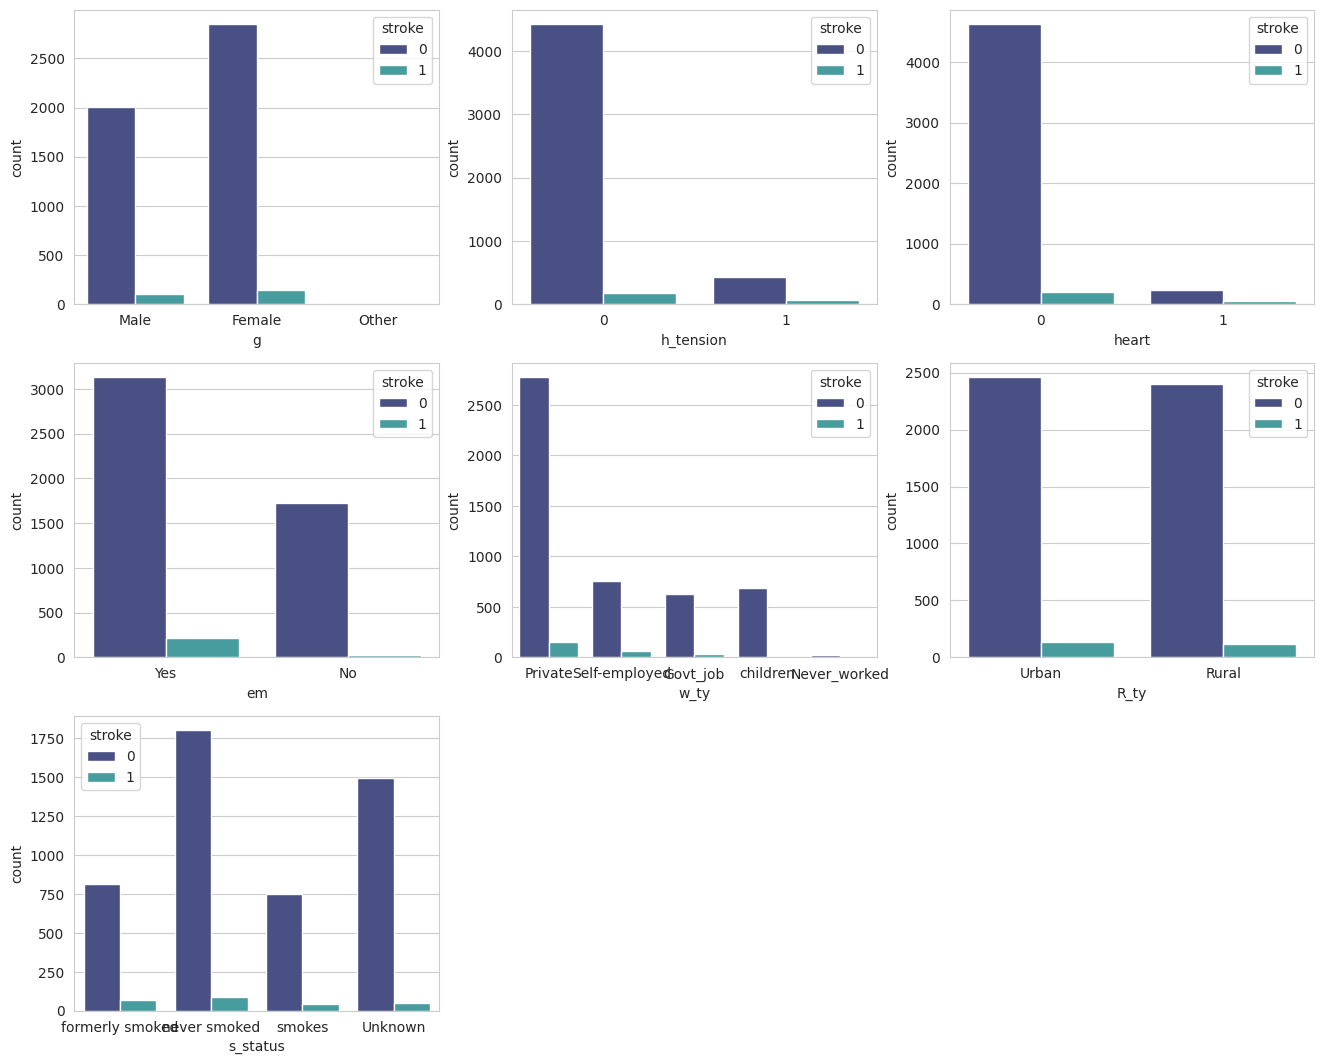

In [63]:
# Visualizing categorical datas
c = ['g', 'h_tension', 'heart', 'em',
       'w_ty', 'R_ty',
       's_status']
p1.figure(figsize=(16,13))
for i in range(len(c)):
    p1.subplot(3,3,i+1)

    sns.countplot(x=df[c[i]],hue = df['stroke'],palette = 'mako')

Text(0.5, 1.0, 'Smoking Status ')

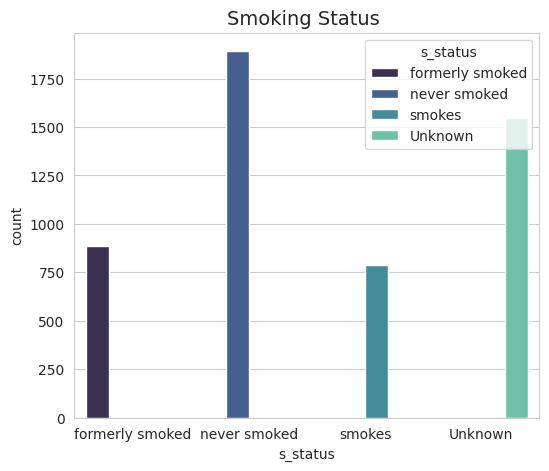

In [64]:
p1.figure(figsize=(6,5))
sns.countplot(x=df['s_status'],palette='mako', hue=df['s_status'])
p1.title('Smoking Status ' , size = 14)
# plt.xlabel('Count',size = 12)

<Axes: xlabel='g', ylabel='count'>

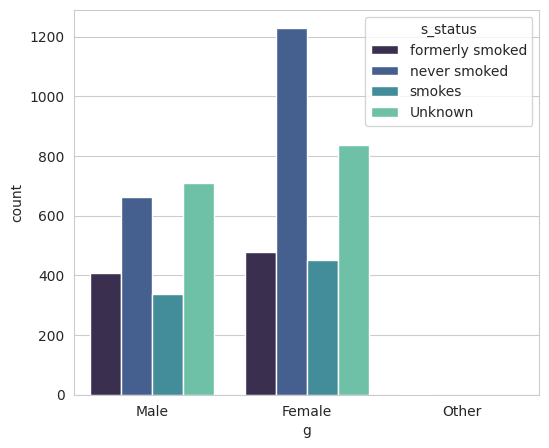

In [65]:
p1.figure(figsize=(6,5))
sns.countplot(x=df['g'],palette='mako', hue=df['s_status'])
# plt.title('Smoking Status ' , size = 14)

# 3. Feature Engineering

## 3.1 Handling categorical values

In [ ]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
for col in df4.columns:
    if df4[col].dtypes != "float64":
        df4[col] = l.fit_transform(df4[col])
df4.dtypes

## 3.2 Handling outlier
- An outlier is a data point that differs significantly from other observations

### 3.2.1 Checking for skewed columns

In [67]:
# Close to zero
print(f"Age: {df4['age'].skew()}")

# More than 1, right skewed
print(f"BMI: {df4['bmi'].skew()}")

# More than 1, right skewed
print(f"Avg glucose level: {df4['a_g'].skew()}")

Age: -0.11906951773810705
BMI: 1.0553402052962928
Avg glucose level: 1.6140261970592311


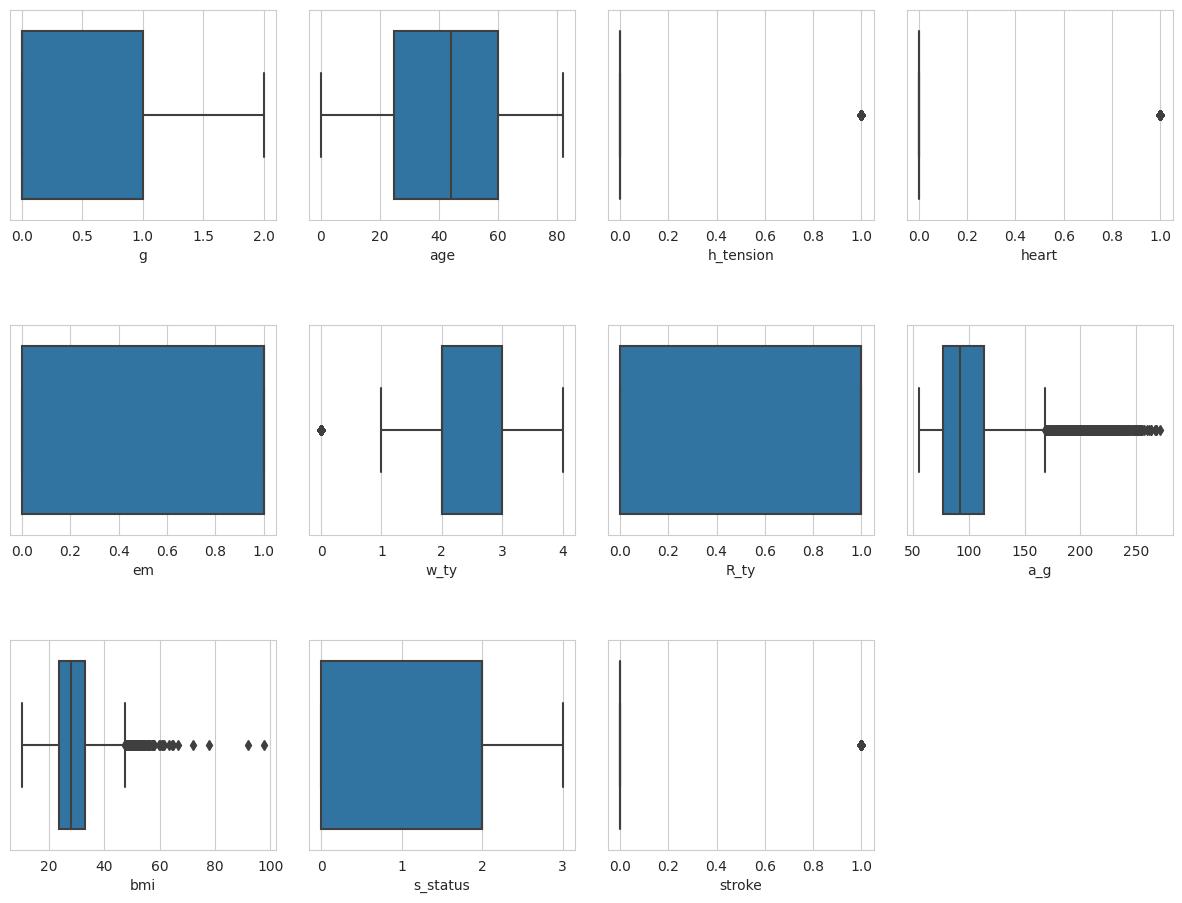

In [68]:
num_cols = df4.columns.tolist()
p1.figure(figsize=(15, 15))

for i in range(len(num_cols)):
    p1.subplots_adjust(hspace=.5, wspace=.125)
    p1.subplot(4, 4, i+1)
    sns.boxplot(x=df4[num_cols[i]])

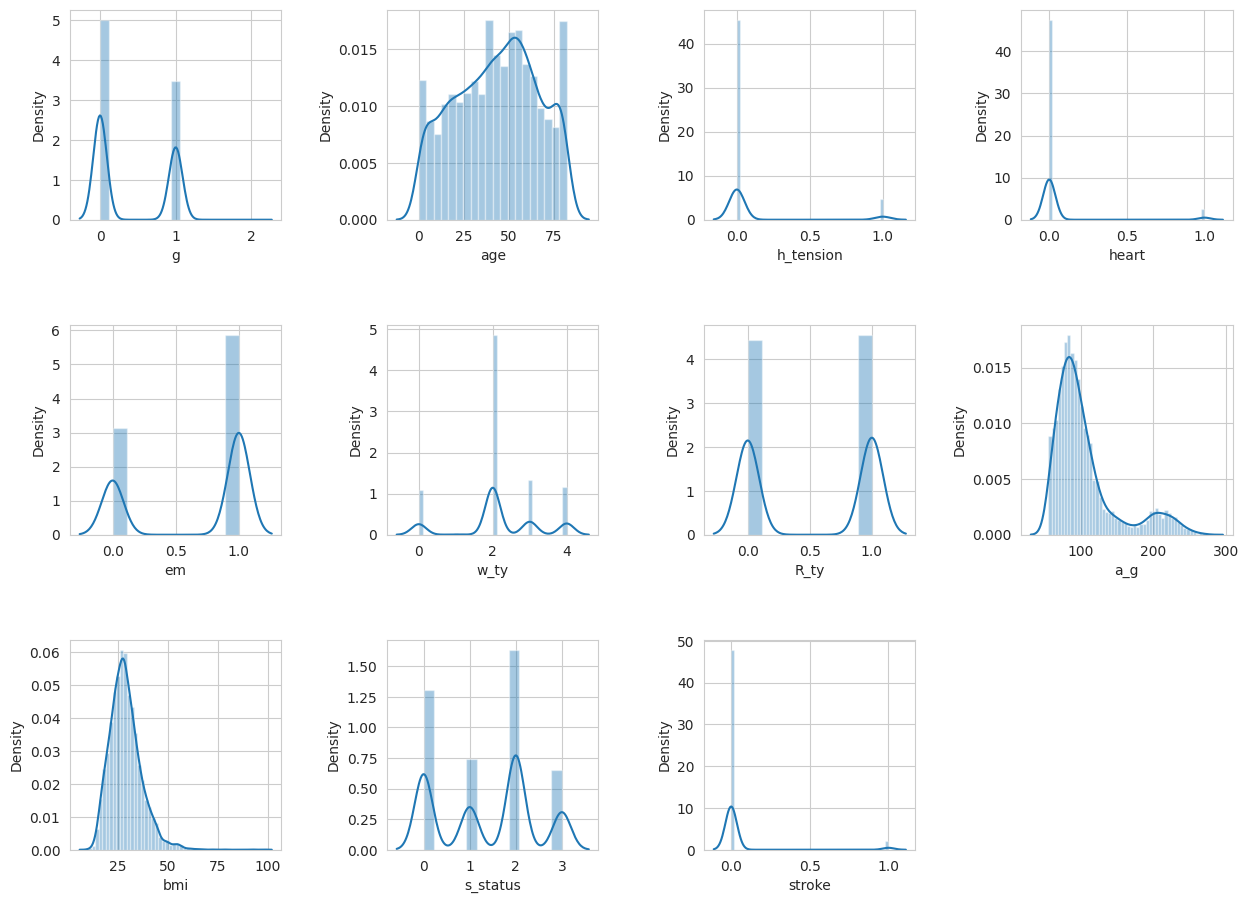

In [69]:
p1.figure(figsize=(15, 15))

for i in range(len(num_cols)):
    p1.subplots_adjust(hspace=.5, wspace=.5)
    p1.subplot(4, 4, i+1)
    sns.distplot(df4[num_cols[i]])
#     plt.title(num_cols[i])

> ### There are some skewed and close to normally distributed columns we can find from the visualization. So, we need to handle the outliers of those columns

### 3.2.2 Detecting the outliers using Interquartile range (IQR)

In [70]:
cols_with_outliers = ["age", "a_g", "bmi"]

In [71]:
def detecting_outliers(data, column):
    q1 = data[column].quantile(.25)
    q3 = data[column].quantile(.75)

    IQR = q3- q1
    lower_bound = q1 - (1.5* IQR)
    upper_bound = q3 + (1.5* IQR)

    ls = data.index[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return ls

### 3.2.3 Finding out the index of outliers and removing duplicate index

In [72]:
index = []
for col in cols_with_outliers:
    index.extend(detecting_outliers(df4,col))

# There maybe some duplicate index due to multiple columns, so we need to remove them.
index = sorted(set(index))

### 3.2.4 Choosing outliers handling technique.
- Trimming will remove the outliers from the dataset. The process is simple, but if there's more outliers, the data frame will be thin.
- Capping will set some min max rule to the outliers. They will round up to the given min or max value. No data will be lost but time consuming.

#### 3.2.4.1 Using trimming method to handle the outliers

In [73]:
with_outliers = df4.shape

df_trimmed =df4.drop(index)
without_outliers = df_trimmed.shape

print(f"With outliers, the shape of the dataset is: {with_outliers}\nWithout outliers, the shape of the dataset is: {without_outliers}")

With outliers, the shape of the dataset is: (4909, 11)
Without outliers, the shape of the dataset is: (4260, 11)


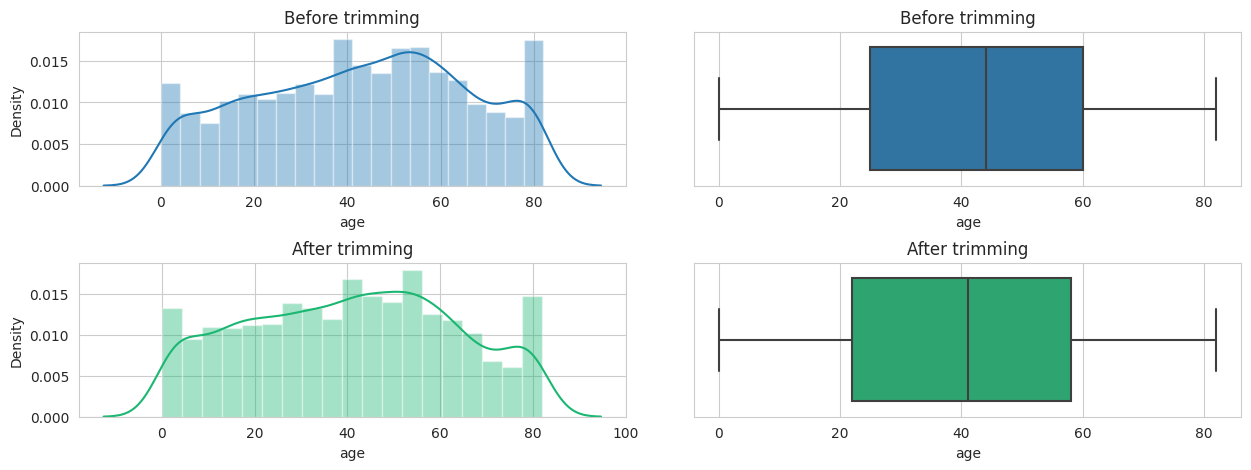

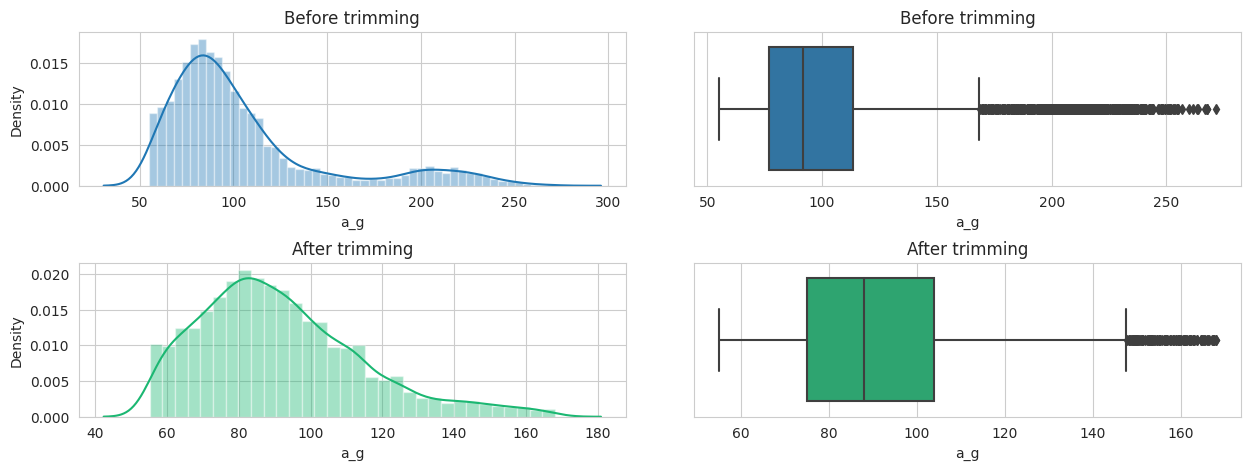

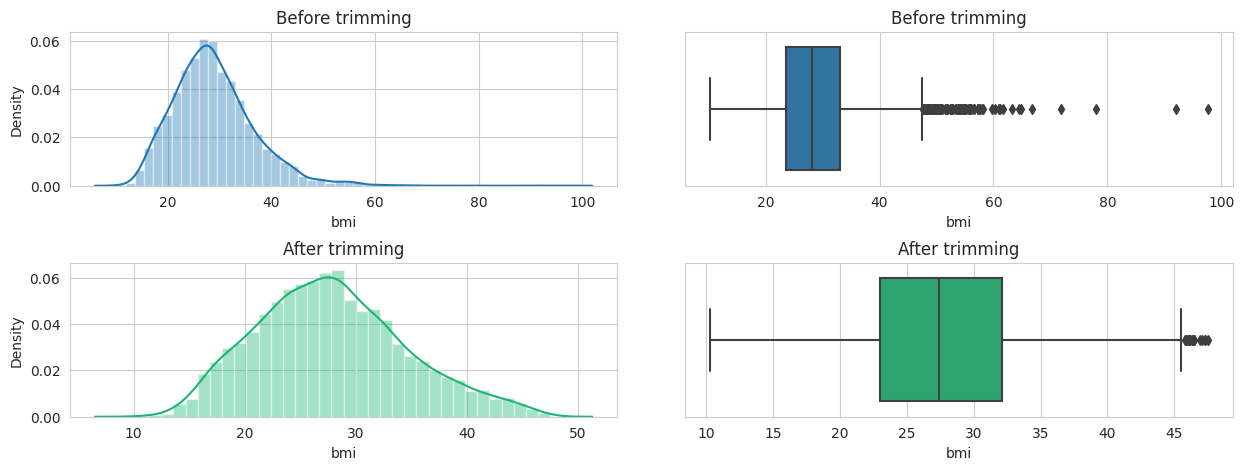

In [74]:
for col in cols_with_outliers:
    p1.figure(figsize=(15,5))
    p1.subplots_adjust(hspace=.5, wspace=.125)

    p1.subplot(2, 2, 1)
    sns.distplot(df4[col]).set(title="Before trimming")

    p1.subplot(2, 2, 2)
    sns.boxplot(x= df4[col]).set(title="Before trimming")

    p1.subplot(2, 2, 3)
    sns.distplot(df_trimmed[col], color="#1BB772").set(title="After trimming")

    p1.subplot(2, 2, 4)
    sns.boxplot(x= df_trimmed[col], color="#1BB772").set(title="After trimming")


#### 3.2.4.2 Using capping method to handle the outliers

In [75]:
df_capped = df4.copy()
for col in cols_with_outliers:
    q1 = df_capped[col].quantile(.25)
    q3 = df_capped[col].quantile(.75)

    IQR = q3- q1
    lower_bound = q1 - (1.5* IQR)
    upper_bound = q3 + (1.5* IQR)

    df_capped[col] = np.where(df_capped[col] > upper_bound, upper_bound,
                                np.where(df_capped[col] < lower_bound,
                                         lower_bound, df_capped[col]))
print(f"With outliers, the shape of the dataset is: {df4.shape}\nWithout outliers, the shape of the dataset is: {df_capped.shape}")

With outliers, the shape of the dataset is: (4909, 11)
Without outliers, the shape of the dataset is: (4909, 11)


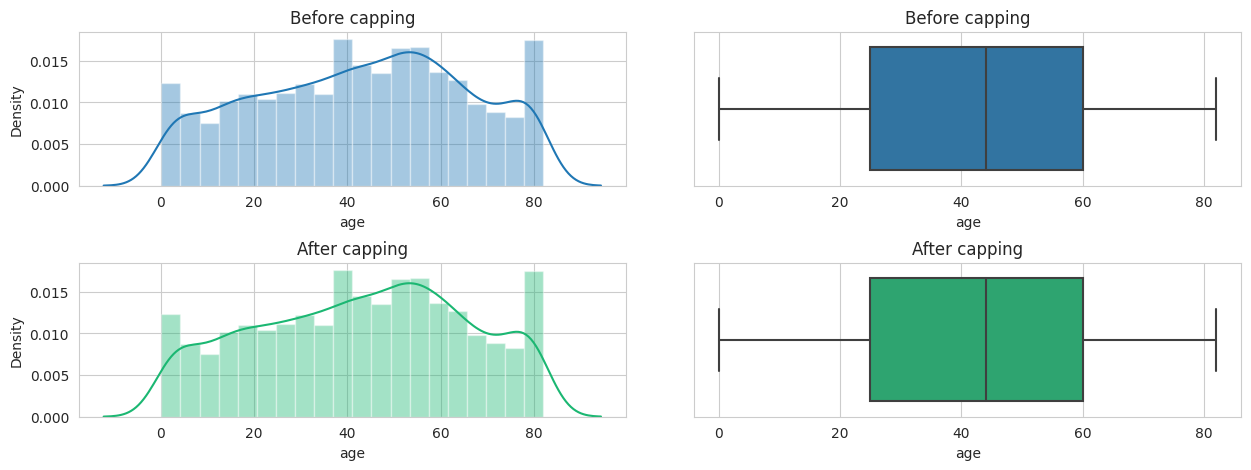

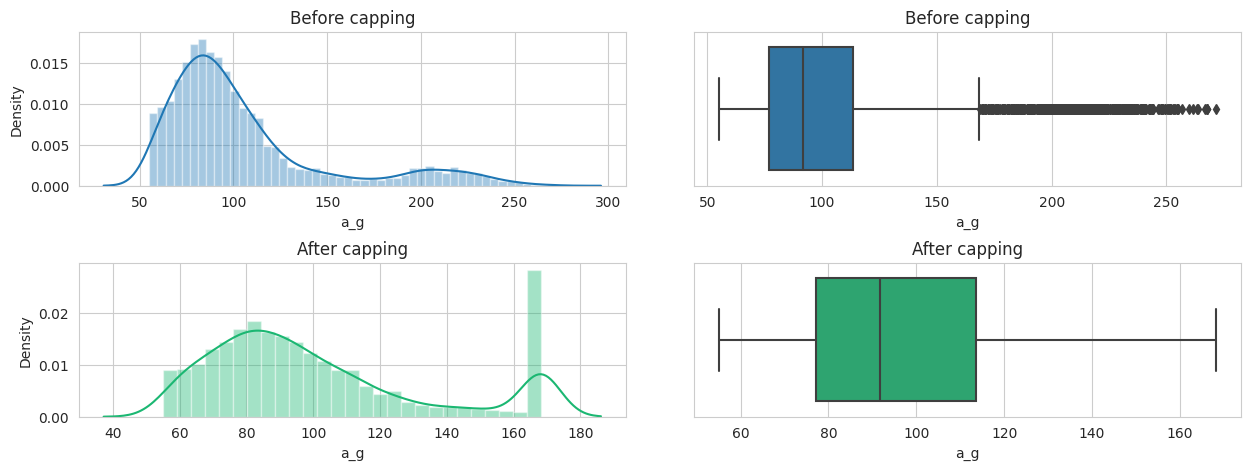

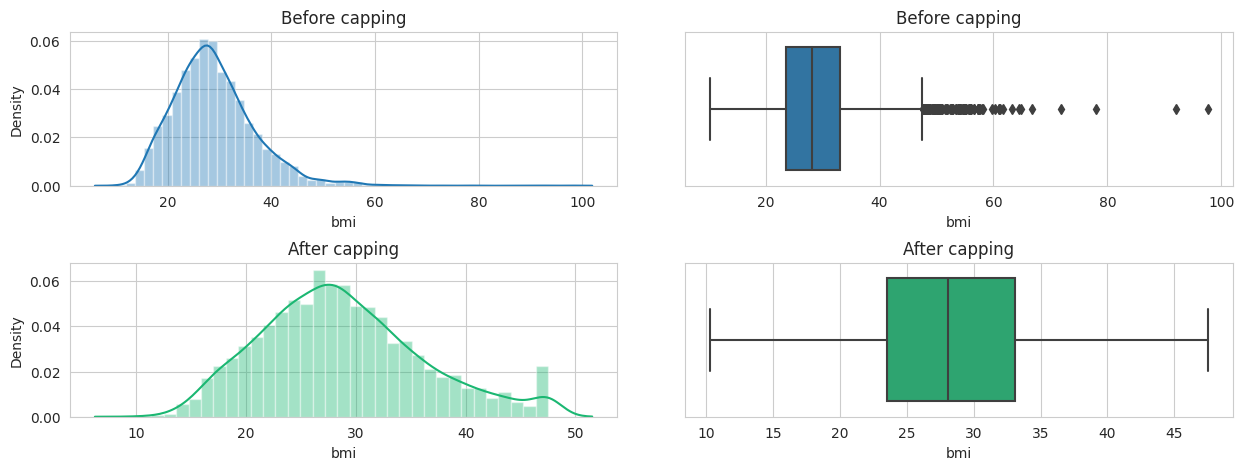

In [76]:
for col in cols_with_outliers:
    p1.figure(figsize=(15,5))
    p1.subplots_adjust(hspace=.5, wspace=.125)

    p1.subplot(2, 2, 1)
    sns.distplot(df4[col]).set(title="Before capping")

    p1.subplot(2, 2, 2)
    sns.boxplot(x= df4[col]).set(title="Before capping")

    p1.subplot(2, 2, 3)
    sns.distplot(df_capped[col], color="#1BB772").set(title="After capping")

    p1.subplot(2, 2, 4)
    sns.boxplot(x= df_capped[col], color="#1BB772").set(title="After capping")

> ### So, we can see that, if we use capping, we will get lot less outliers than trimming. Also, trimming in this dataset on only 3 column removes more than 600 datapoints, which is not ideal.

## 3.3 Resampling the imbalanced data
- Resampling is a way we can use to balance the unbalanced data. By randomly removing the samples from majority class(Under-sampling) or randomly duplicating samples from minority class(Over-sampling), we can balance the data. Though this approach can cause loss of function due to under-sampling, or overfit problem due to over-sampling.

In [77]:
df_capped.shape

(4909, 11)

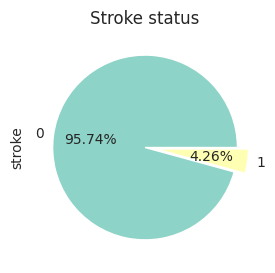

In [78]:
y = df_capped["stroke"]
p1.figure(figsize=(5, 3))
y.value_counts().plot.pie(autopct="%1.2f%%", colors=sns.color_palette('Set3'), explode=[0, 0.12], title="Stroke status");

<Axes: title={'center': 'Count stroke status'}>

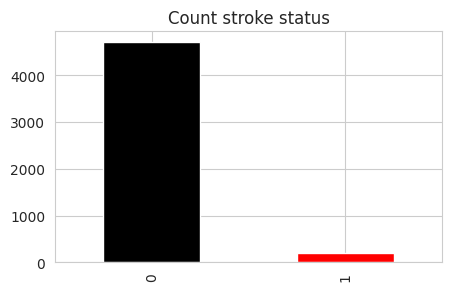

In [79]:
p1.figure(figsize=(5, 3))
df_capped['stroke'].value_counts().plot(kind='bar', title='Count stroke status', color=['black', 'red'])

In [80]:
# Class count
c_c_0, c_c_1 = df_capped['stroke'].value_counts()
print(c_c_0)
print(c_c_1)

# Divide by class
df_class_0 = df_capped[df_capped['stroke'] == 0]
df_class_1 = df_capped[df_capped['stroke'] == 1]

4700
209


### 3.3.1 Random under-sampling
- Randomly removing samples from majority class

undersampling:
0    209
1    209
Name: stroke, dtype: int64
Shape of the new dataset is (418, 11)



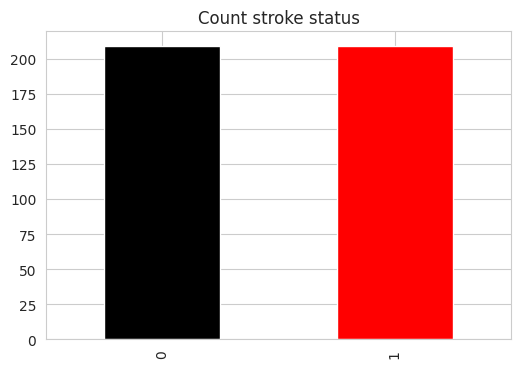

In [81]:
df1_c_0_u1 = df_class_0.sample(c_c_1)
df1_t_u = ps.concat([df1_c_0_u1, df_class_1], axis=0)
print('undersampling:')
print(df1_t_u['stroke'].value_counts())
p1.figure(figsize=(6, 4))
y = df1_t_u['stroke'].value_counts().plot(kind='bar', title='Count stroke status', color=['black', 'red'])
print(f"Shape of the new dataset is {df1_t_u.shape}\n")

### 3.3.2 Random over-sampling
- Randomly duplicating samples from minority class

Random under-sampling:
0    4700
1    4700
Name: stroke, dtype: int64
Shape of the new dataset is (9400, 11)



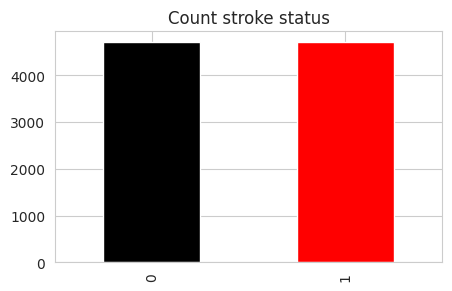

In [82]:
df1_c_1_o = df_class_1.sample(c_c_0, replace=True)
df1_t_o = ps.concat([df_class_0, df1_c_1_o], axis=0)

print('Random under-sampling:')
print(df1_t_o['stroke'].value_counts())

p1.figure(figsize=(5, 3))
y = df1_t_o['stroke'].value_counts().plot(kind='bar', title='Count stroke status', color=['black', 'red'])
print(f"Shape of the new dataset is {df1_t_o.shape}\n")

## 3.4 Data splitting and scalling

In [83]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split

X1 = df1_t_o.drop(columns='stroke')
y1 = df1_t_o['stroke']

# Using stratify kFold
X1_tr,X1_te,y1_tr,y1_te = train_test_split(X1,y1,train_size = 0.7,random_state = 20, stratify = y1)

In [ ]:
c_t_s= []
for f in X1.columns:
    if X1[f].max() > 1:
        c_t_s.append(f)
c_t_s

In [ ]:
# Before scalling the data
X1_tr[c_t_s].sample(5)

In [86]:
# Using MinMaxScaler to scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Caution! We ned to keep in mind that, while scaling, we need to consider only the train set while training the scaling model,
# because if the whole dataset is considered, the model might get some value from the test set which makes the model biased.
scaler.fit(X1_tr[c_t_s])
X1_tr[c_t_s] = scaler.transform(X1_tr[c_t_s])
X1_te[c_t_s] = scaler.transform(X1_te[c_t_s])

In [ ]:
# After scalling the data
X1_tr[c_t_s].sample(5)

# 4. Building models

## 4.1 Decision Tree Classifier

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(criterion='entropy')
dt1.fit(X1_tr, y1_tr)
y1_p = dt1.predict(X1_te)

print(classification_report(y1_te, y1_p))
print("Train Accuracy: ", accuracy_score(y1_tr, dt1.predict(X1_tr)))
print("Test Accuracy: ", accuracy_score(y1_te, y1_p))

## 4.2 KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2) # Euclidean Distance Metrics
k1.fit(X1_tr, y1_tr)
y1_p = k1.predict(X1_te)

print(classification_report(y1_te, y1_p))
print("Train Accuracy: ", accuracy_score(y1_tr, dt1.predict(X1_tr)))
print("Test Accuracy: ", accuracy_score(y1_te, y1_p))

## 4.3 Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
g1= GaussianNB()
g1.fit(X1_tr, y1_tr)
y1_p = g1.predict(X1_te)
print(classification_report(y1_te, y1_p))
print("Train Accuracy: ", accuracy_score(y1_tr, g1.predict(X1_tr)))
print("Test Accuracy: ", accuracy_score(y1_te, y1_p))

## 4.4 Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
s1= SVC()
s1.fit(X1_tr, y1_tr)
y1_p = s1.predict(X1_te)

print(classification_report(y1_te, y1_p))
print("Train Accuracy: ", accuracy_score(y1_tr, s1.predict(X1_tr)))
print("Test Accuracy: ", accuracy_score(y1_te, y1_p))

## 4.5 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
l_r = LogisticRegression()
l_r.fit(X1_tr, y1_tr)
y1_p = l_r.predict(X1_te)

print(classification_report(y1_te, y1_p))
print("Train Accuracy: ", accuracy_score(y1_tr, l_r.predict(X1_tr)))
print("Test Accuracy: ", accuracy_score(y1_te, y1_p))

## 4.6 Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_regr = RandomForestClassifier(n_estimators=120, criterion='entropy', random_state=1)
rf_regr.fit(X1_tr, y1_tr)
y1_p = rf_regr.predict(X1_te)

print(classification_report(y1_te, y1_p))
print("Train Accuracy: ", accuracy_score(y1_tr, rf_regr.predict(X1_tr)))
print("Test Accuracy: ", accuracy_score(y1_te, y1_p))

## 4.7 Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
m1= [("DecissionTree",dt1), ("KNN", k1), ("NaiveBayes",g1), ("SupportVector", s1),
                                ("LogisticRegression",l_r), ("RandomForest",rf_regr)]
v1= VotingClassifier(estimators=m1)
v1.fit(X1_tr, y1_tr)
y1_p = v1.predict(X1_te)

print(classification_report(y1_te, y1_p))
print("Train Accuracy: ", accuracy_score(y1_tr, v1.predict(X1_tr)))
print("Test Accuracy: ", accuracy_score(y1_te, y1_p))

## 4.8 Bagging Classifier

In [ ]:
# Bagging using decision tree classifier
from sklearn.ensemble import BaggingClassifier
b_c= BaggingClassifier(estimator= dt1, n_estimators=10)
b_c.fit(X1_tr, y1_tr)

y1_p = b_c.predict(X1_te)

print(classification_report(y1_te, y1_p))
print("Train Accuracy: ", accuracy_score(y1_tr, b_c.predict(X1_tr)))
print("Test Accuracy: ", accuracy_score(y1_te, y1_p))

In [ ]:
# Bagging using KNN classifier
from sklearn.ensemble import BaggingClassifier
b_c= BaggingClassifier(estimator= k1, n_estimators=10)
b_c.fit(X1_tr, y1_tr)

y1_p = b_c.predict(X1_te)

print(classification_report(y1_te, y1_p))
print("Train Accuracy: ", accuracy_score(y1_tr, b_c.predict(X1_tr)))
print("Test Accuracy: ", accuracy_score(y1_te, y1_p))

## 4.9 Stacking Classifier

In [ ]:
from sklearn.ensemble import StackingClassifier
m2= [("DecissionTree",dt1), ("KNN", k1), ("NaiveBayes",g1), ("SupportVector", s1),
                                ("LogisticRegression",l_r), ("RandomForest",rf_regr)]
sc1= StackingClassifier(estimators=m2)
sc1.fit(X1_tr, y1_tr)
y1_p = sc1.predict(X1_te)

print(classification_report(y1_te, y1_p))
print("Train Accuracy: ", accuracy_score(y1_tr, sc1.predict(X1_tr)))
print("Test Accuracy: ", accuracy_score(y1_te, y1_p))

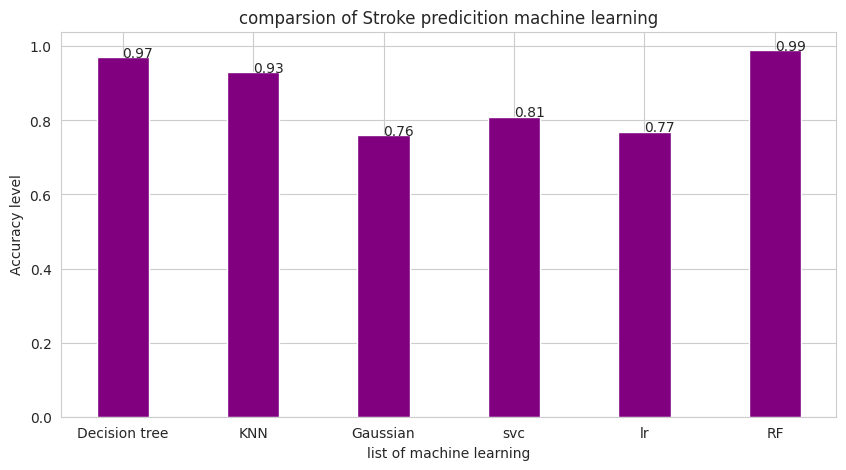

In [98]:
def alabel(Alg,Acc):
    for i1 in range(len(Alg)):
        p1.text(i1,Acc[i1],Acc[i1])
d1 = {'Decision tree':0.97, 'KNN':0.93, 'Gaussian':0.76,
        'svc':0.81,'lr':0.77, 'RF':0.99}
Alg = list(d1.keys())
Acc = list(d1.values())

fig = p1.figure(figsize = (10, 5))


p1.bar(Alg,Acc, color ='purple',
        width = 0.4)
alabel(Alg,Acc)
p1.xlabel("list of machine learning")
p1.ylabel("Accuracy level")
p1.title("comparsion of Stroke predicition machine learning")
p1.show()

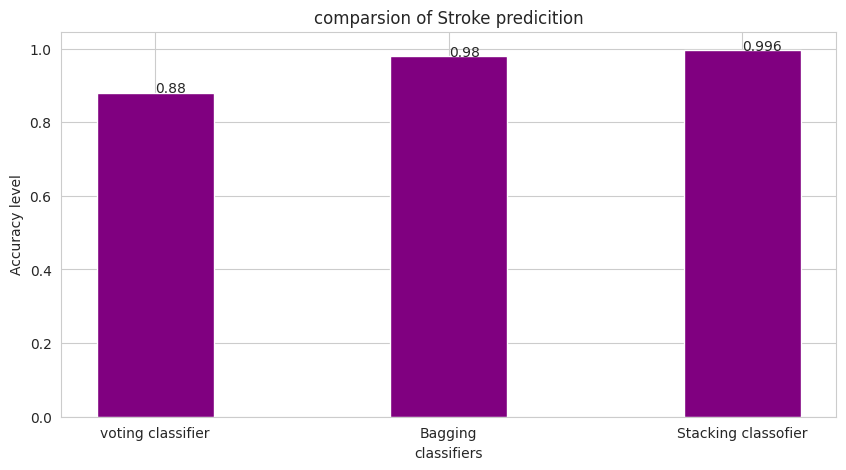

In [99]:
def alabel(Alg,Acc):
    for i1 in range(len(Alg)):
        p1.text(i1,Acc[i1],Acc[i1])
d1 = {'voting classifier':0.88, 'Bagging':0.98, 'Stacking classofier':0.996}
Alg = list(d1.keys())
Acc = list(d1.values())

fig = p1.figure(figsize = (10, 5))


p1.bar(Alg,Acc, color ='purple',
        width = 0.4)
alabel(Alg,Acc)
p1.xlabel("classifiers")
p1.ylabel("Accuracy level")
p1.title("comparsion of Stroke predicition")
p1.show()